In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature
import requests
import os,sys
from mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic
import glob
import statsmodels.api as sm
import xskillscore
import pymannkendall as mk

In [2]:
file_path_rea = '/home/tiro/Data/atkins/activities/activity_2.1b/data/rea*/*/*/*/*/*/sadc/'
file_path_obs = '/home/tiro/Data/atkins/activities/activity_2.1b/data/*/*/*/*/*/*/sadc/'

files_rea = glob.glob(file_path_rea+'*era5.nc')
files_obs = glob.glob(file_path_obs+'*era5.nc')

In [3]:
### Annual sum files

file_path_obs_seas = '/home/tiro/Data/atkins/activities/activity_2.1b/data/*/*/*/*/*/*/sadc/regridded/'
files_obs_seas = glob.glob(file_path_obs_seas+'*seas.nc')

files_obs_seas_clim = glob.glob(file_path_obs_seas+'*seas_clim.nc')
#files_obs_ann_clim

In [4]:
def get_linear(_y, what="slope"):
    # receives 
    # data need to be regularly spaced
    # returns slope in units of _y per unit of _x, intercept in units of _y or pvalue
    # pvalue is analytical, perhaps one day I will implement bootstrap 
    #
    # need to add constant for OLS does not include intercept by default 
    if not np.ma.is_masked(_y):
        _x = sm.add_constant(np.arange(len(_y)))
        res=sm.OLS(_y, _x, missing='none').fit()
        #res=sm.OLS(_y, _x, missing='drop').fit()
        if what=="slope":
            return res.params[1]
        elif what=="pval":
            return res.pvalues[1]    # results from the t_test, checking if the data follows a 
        elif what=="intercept":
            return res.params[0]
    else:
        return np.nan

In [5]:
def choose_var_bias(var):
        return {
        #'variable': ['min_ref', 'max_ref', 'step', 'min_bias', 'max_bias', 'step_biaas']
        'pr'                                                        :  [ 0, 800, 100, -150, 150, 20],
        'precipitation'                                             :  [ 0, 800, 100, -150, 150, 20],
    }[var]
#number_of_5day_heavy_precipitation_periods_per_time_period

In [6]:
def choose_var_trend(var):
        return {
        #'variable': ['min_ref', 'max_ref', 'step', 'min_bias', 'max_bias', 'step_bias', 'units']
        'pr'                                                        :  [ 150, 700, 50, -10, 10, 2],
        'precipitation'                                             :  [ 150, 700, 50, -10, 10, 2],
    }[var]

In [7]:
def choose_var_rsme(var):
        return {
        #'variable': ['min_ref', 'max_ref', 'step', 'min_bias', 'max_bias', 'step_biaas']
        'pr'                                                        :  [ 100, 1500, 100, 0, 500, 50],
        'precipitation'                                             :  [ 100, 1500, 100, 0, 500, 50],
    }[var]

In [8]:
def choose_var_corr(var):
        return {
        #'variable': ['min_ref', 'max_ref', 'step', 'min_bias', 'max_bias', 'step_biaas']
        'pr'                                                        :  [ 100, 1500, 100, -1, 1, .2],
        'precipitation'                                             :  [ 100, 1500, 100, -1, 1, .2],   
    }[var]

In [9]:
mask_file = glob.glob(file_path_rea+'era5_land_sea_mask_SA_no_lakes.nc')
mask = xr.open_dataset(mask_file[0]).pr

/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(3334.13354492)]
CMORPH-CDR


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(10.32608604), array(1611.60424805)]
mswep-v280


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(8.61980152), array(1066.94421387)]
full-data-first-guess


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(1155.55969238)]
CHIRPS-2.0-0p25


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(1203.27319336)]
RFE-filled-V3.1


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.04666667), array(954.55657959)]
ARC2


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(2.50054193), array(849.9442749)]
ERA5


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(9.25802994), array(5789.66162109)]


/tmp/ipykernel_11801/3212987355.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(3334.13354492)]
CMORPH-CDR


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.03043479), array(1912.86071777)]
mswep-v280


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.02917008), array(1341.09729004)]
full-data-first-guess


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(1326.68041992)]
CHIRPS-2.0-0p25


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(1626.58374023)]
RFE-filled-V3.1


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(1630.9732666)]
ARC2


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(1152.18591309)]
ERA5


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/tmp/ipykernel_11801/3212987355.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


[array(0.00695905), array(6295.33007812)]


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(3334.13354492)]
CMORPH-CDR


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(2.26086998), array(1927.59558105)]
mswep-v280


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(2.65418077), array(1086.67834473)]
full-data-first-guess


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(1356.8190918)]
CHIRPS-2.0-0p25


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(1226.2532959)]
RFE-filled-V3.1


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.15000001), array(1308.03100586)]
ARC2


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(1.15616524), array(877.21594238)]
ERA5


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(2.88182783), array(5064.32519531)]


/tmp/ipykernel_11801/3212987355.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(3334.13354492)]
CMORPH-CDR


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.9173913), array(1453.71276855)]
mswep-v280


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(1.86355603), array(1330.18811035)]
full-data-first-guess


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(1165.99255371)]
CHIRPS-2.0-0p25


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.), array(1363.36572266)]
RFE-filled-V3.1


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.33185184), array(1451.32348633)]
ARC2


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


[array(0.34208813), array(1110.62475586)]
ERA5


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/tmp/ipykernel_11801/3212987355.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


[array(0.18568662), array(3458.99365234)]


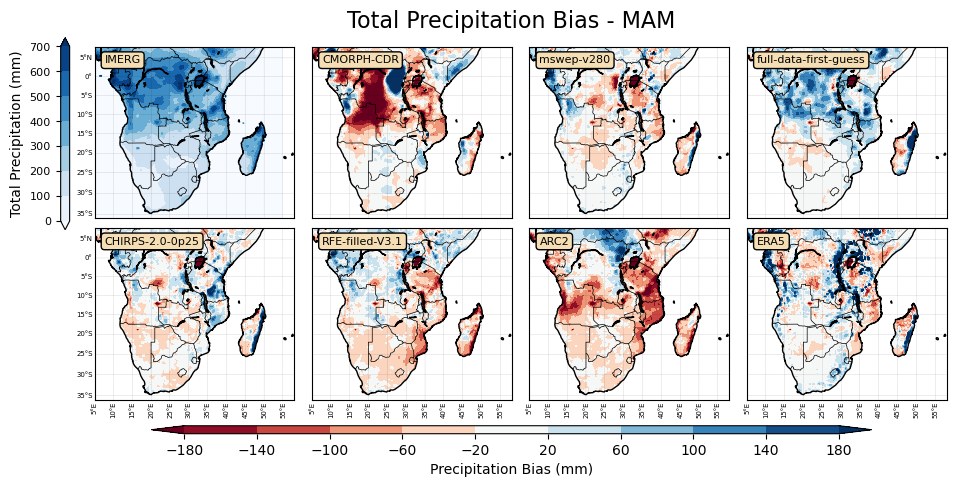

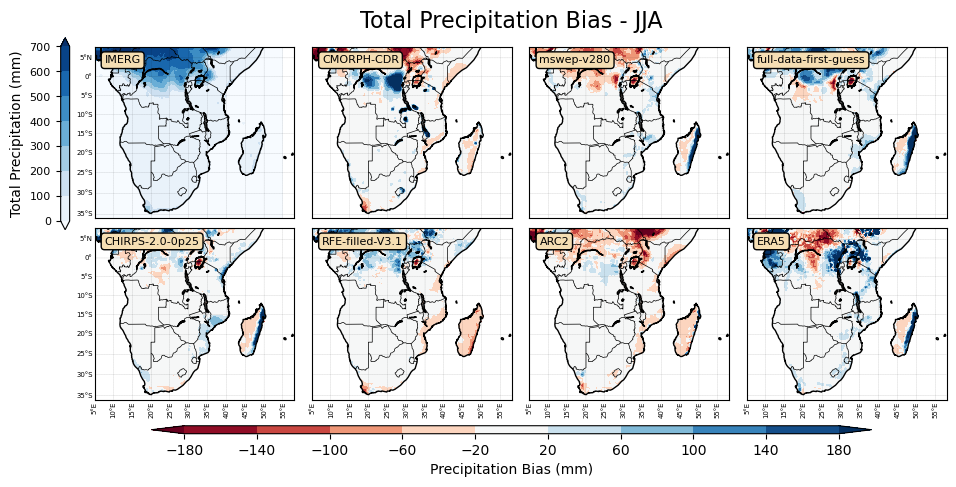

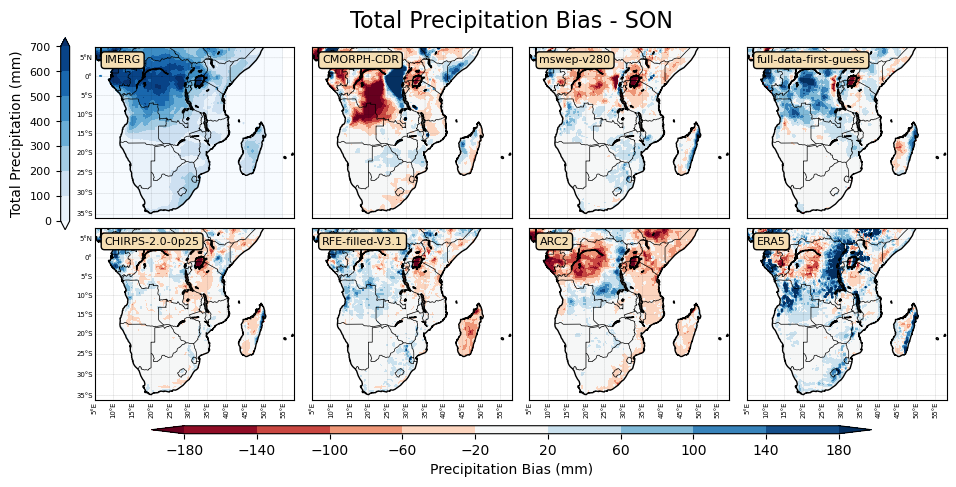

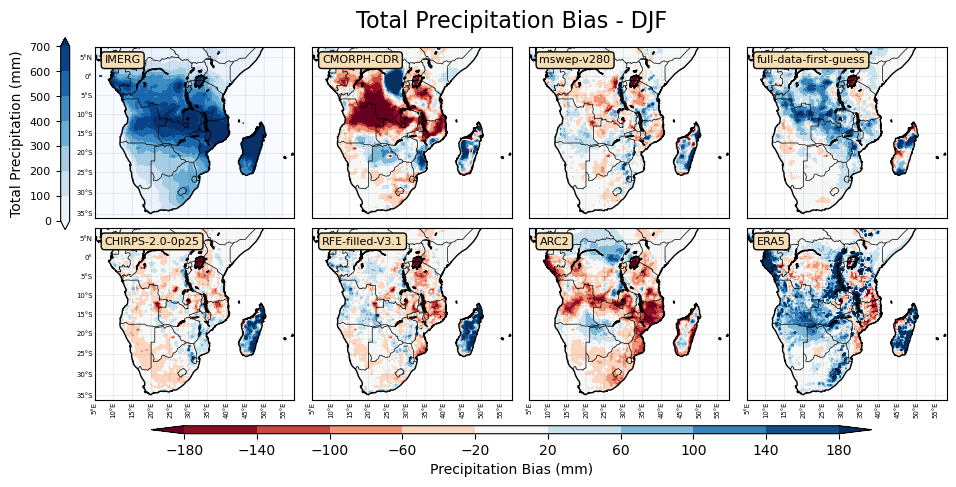

In [10]:
## #fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,6))
def choose_var_bias(var):
        return {
        #'variable': ['min_ref', 'max_ref', 'step', 'min_bias', 'max_bias', 'step_biaas']
        'pr'                                                        :  [ 0, 800, 100, -180, 200, 40],
        'precipitation'                                             :  [ 0, 800, 100, -180, 200, 40],
    }[var]
#number_of_5day_heavy_precipitation_periods_per_time_period

year1 = str(1991)
year2 = str(2020)

var = 'pr'
variables = ['pr']

observed_data = files_obs_seas
ref_file = [observed_data[0]]
observed_data = observed_data[1:len(observed_data)]
ifile = ref_file[0]
#ax = fig.add_subplot(3, 2, i+1)

file_xr = xr.open_dataset(ifile)
seasons = [3, 6, 9, 12]
#variables = list(file_xr.keys())
for month in seasons:
    if month == 12:
        season = 'DJF'
    if month == 3:
        season = 'MAM'
    if month == 9:
        season = 'SON'
    if month ==6:
        season = 'JJA'
    for var in variables:
        fig = plt.figure(figsize=(9,4))
        i=1
        ax = fig.add_subplot(2, 4, i)
        ifile = ref_file[0]
        file_split=ifile.split("/")
        filename=file_split[-1]
        filename_split=filename.split("_")
        filename_base=filename.split(".")[0]
        institute=filename_split[2]  
        dataset=filename_split[3]
        file_xr = xr.open_dataset(ifile)
        #units = file_xr[var].attrs['units']
        lons = file_xr.variables['longitude'][:]
        lats = file_xr.variables['latitude'][:]
        levs = np.arange(choose_var_bias(var)[0],choose_var_bias(var)[1], choose_var_bias(var)[2])
        map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
        x2d, y2d = map(*np.meshgrid(lons,lats))
        #####
        
        clim_var_ref = file_xr[var].sel(time=slice(year1,year2))
        clim_var_ref = clim_var_ref*mask
        clim_var_ref = clim_var_ref.resample(time="QS-DEC").sum()
        clim_var_ref_seas = clim_var_ref[clim_var_ref.time.dt.month == month].mean('time')
        pl1 = map.contourf(x2d,y2d,clim_var_ref_seas[:,:],levs,extend='both',cmap='Blues')
        ####
        min_val = clim_var_ref.min().values
        max_val = clim_var_ref.max().values
        print([min_val, max_val])
        map.drawcoastlines()
        map.drawcountries()
        map.drawparallels(np.arange(-80., 81., 5), \
            labels=[1,0,0,0], fontsize=5,linewidth=0.1)
        map.drawmeridians(np.arange(-180., 181., 5),\
                labels=[0,0,0,0], fontsize=0,linewidth=0.1)

        props = dict(boxstyle='round', facecolor='wheat', alpha=1)
        ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)

        for ifile in observed_data: 
            i=i+1
            var = 'pr'
            ax = fig.add_subplot(2, 4, i)
            file_split=ifile.split("/")
            filename=file_split[-1]
            filename_split=filename.split("_")
            filename_base=filename.split(".")[0]
            institute=filename_split[2]  
            dataset=filename_split[3]
            print(dataset)
            file_xr = xr.open_dataset(ifile)
            lons = file_xr.variables['longitude'][:]
            lats = file_xr.variables['latitude'][:]
            if dataset == 'mswep-v280':
                var = 'precipitation'
            levs_1 = np.arange(choose_var_bias(var)[3],choose_var_bias(var)[4], choose_var_bias(var)[5])
            map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
            x2d, y2d = map(*np.meshgrid(lons,lats))
            
            
            clim_var_1 = file_xr[var].sel(time=slice(year1,year2))
            clim_var = clim_var_1.resample(time="QS-DEC").sum()
            clim_var = clim_var*mask
            clim_var_seas = clim_var[clim_var.time.dt.month == month].mean('time')
            clim_var_bias_seas = clim_var_seas - clim_var_ref_seas
            min_val = clim_var_seas.min().values
            max_val = clim_var_seas.max().values

            print([min_val, max_val])
            pl2 = map.contourf(x2d,y2d,clim_var_bias_seas[:,:],levs_1,extend='both',cmap='RdBu')
            map.drawcoastlines()
            map.drawcountries()

            if i in [2,3,4]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
            if i in [5]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[1,0,0,0], fontsize=5,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)
            if i in [6,7,8,9]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)

            props = dict(boxstyle='round', facecolor='wheat', alpha=1)
            ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)
        #cax = plt.axes([0.93, 0.2, 0.01, 0.6])

            #bar.set_label('Temperature ($^\circ$C)',size=12)
            #bar.ax.tick_params(labelsize=8, zorder='right') 

        cax2 = fig.add_axes([-0.001, 0.5, 0.01, 0.48])   
        bar2 = fig.colorbar(pl1, cax=cax2, orientation='vertical', ticklocation = 'left', extend = 'max')
        bar2.set_label('Total Precipitation (mm)',size=10)
        bar2.ax.tick_params(labelsize=8) 
        #bar2.ax.tick_params(labelsize=8,labelleft='True', labelright = 'False', left = 'True', right = 'False')

        cax = fig.add_axes([0.1, -0.01, 0.8, 0.02])   
        bar = fig.colorbar(pl2, cax=cax, orientation='horizontal')
        bar.set_label('Precipitation Bias (mm)',size=10)
        plt.tight_layout()

        #fig.suptitle(var, fontsize=16, y=1.05)
        #fig.show()
        fig.suptitle('Total Precipitation Bias - '+ season, fontsize=16, y=1.05)
        #fig.show()
        #plt.savefig('../Images/prcptot/'+var+'_bias_'+season+'.png', bbox_inches='tight',dpi=300)


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version 

/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/tmp/ipykernel_11801/1467206284.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


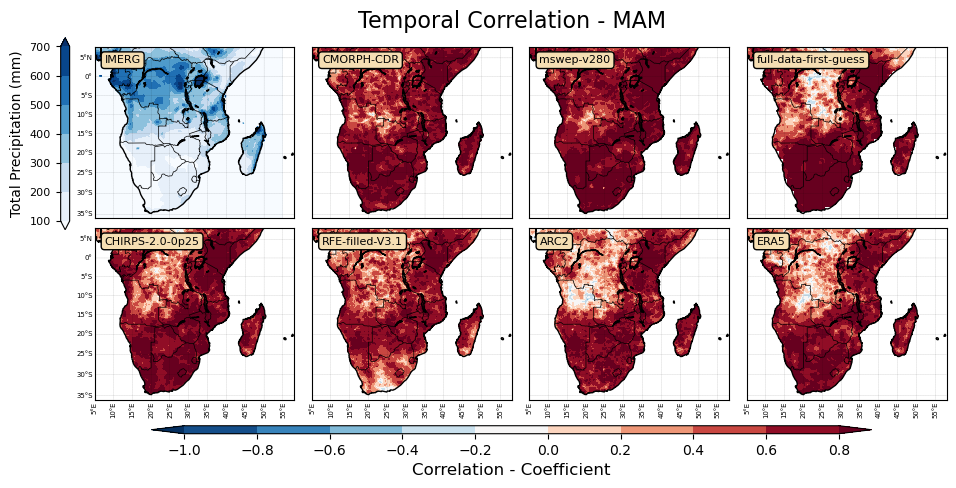

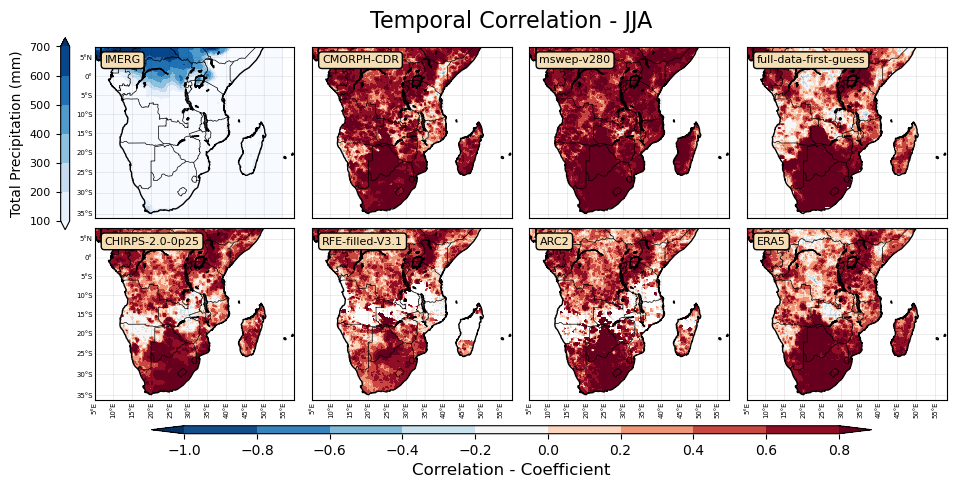

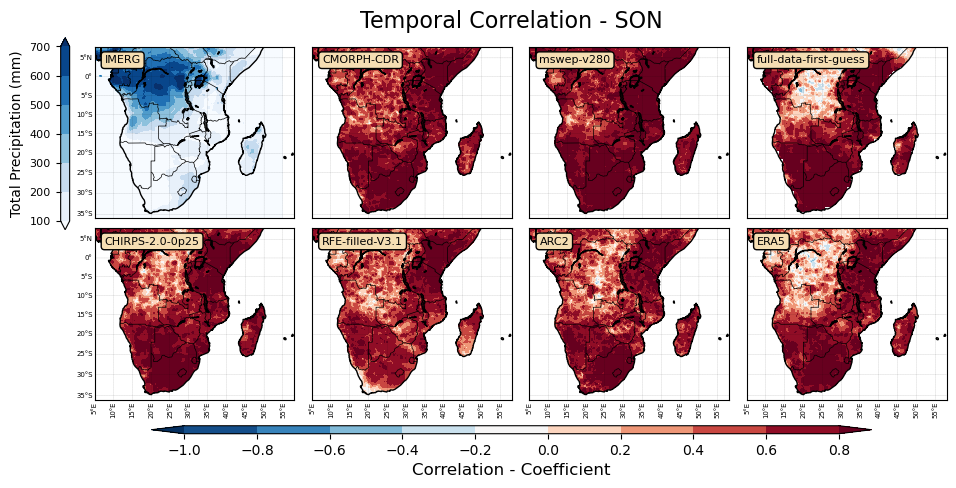

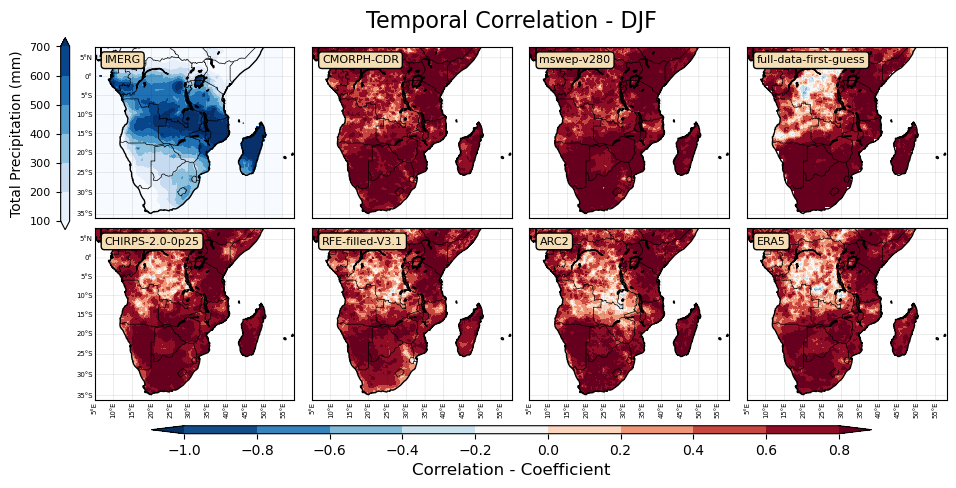

In [11]:
def choose_var_corr(var):
        return {
        #'variable': ['min_ref', 'max_ref', 'step', 'min_bias', 'max_bias', 'step_biaas']
        'pr'                                                        :  [ 100, 800, 100, -1, 1, .2],
        'precipitation'                                             :  [ 100, 800, 100, -1, 1, .2],   
    }[var]
#fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,6))

year1 = str(2001)
year2 = str(2020)

var = 'pr'
variables = ['pr']

observed_data = files_obs_seas
ref_file = [observed_data[0]]
observed_data = observed_data[1:len(observed_data)]

#variables = list(file_xr.keys())
seasons = [3, 6, 9, 12]
#variables = list(file_xr.keys())
for month in seasons:
    if month == 12:
        season = 'DJF'
    if month == 3:
        season = 'MAM'
    if month == 9:
        season = 'SON'
    if month ==6:
        season = 'JJA'
    for var in variables:
        fig = plt.figure(figsize=(9,4))
        i=1
        ax = fig.add_subplot(2, 4, i)
        ifile = ref_file[0]
        file_split=ifile.split("/")
        filename=file_split[-1]
        filename_split=filename.split("_")
        filename_base=filename.split(".")[0]
        institute=filename_split[2]  
        dataset=filename_split[3]
        file_xr = xr.open_dataset(ifile)
        #units = file_xr[var].attrs['units']
        lons = file_xr.variables['longitude'][:]
        lats = file_xr.variables['latitude'][:]
        levs = np.arange(choose_var_corr(var)[0],choose_var_corr(var)[1], choose_var_corr(var)[2])
        map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
        x2d, y2d = map(*np.meshgrid(lons,lats))
        clim_var_ref = file_xr[var]
        #clim_var_ref = clim_var_ref*mask
        #clim_var_ref_1 =clim_var_ref.resample(time='1Y').sum().mean('time')

        clim_var_ref = clim_var_ref*mask
        clim_var_ref = clim_var_ref.resample(time="QS-DEC").sum()
        clim_var_ref_seas = clim_var_ref[clim_var_ref.time.dt.month == month]
        clim_var_ref_seas_clim = clim_var_ref_seas.mean('time')
        
        #clim_var_ref = file_xr_ref[var].sel(time=slice(year1,year2))
        #clim_var_ref1 = file_xr_ref[var].sel(time=slice(year1,year2)).mean('time')

        pl1 = map.contourf(x2d,y2d,clim_var_ref_seas_clim[:,:],levs,extend='both',cmap='Blues')
        #min_val = clim_var_ref.min().values
        #max_val = clim_var_ref.max().values
        #print([min_val, max_val])
        map.drawcoastlines()
        map.drawcountries()
        map.drawparallels(np.arange(-80., 81., 5), \
            labels=[1,0,0,0], fontsize=5,linewidth=0.1)
        map.drawmeridians(np.arange(-180., 181., 5),\
                labels=[0,0,0,0], fontsize=0,linewidth=0.1)

        props = dict(boxstyle='round', facecolor='wheat', alpha=1)
        ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)

        for ifile in observed_data: 
            i=i+1
            var = 'pr'
            ax = fig.add_subplot(2, 4, i)
            file_split=ifile.split("/")
            filename=file_split[-1]
            filename_split=filename.split("_")
            filename_base=filename.split(".")[0]
            institute=filename_split[2]  
            dataset=filename_split[3]
            file_xr = xr.open_dataset(ifile)
            lons = file_xr.variables['longitude'][:]
            lats = file_xr.variables['latitude'][:]
            if dataset == 'mswep-v280':
                var = 'precipitation'
            levs_1 = np.arange(choose_var_corr(var)[3],choose_var_corr(var)[4], choose_var_corr(var)[5])
            map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
            x2d, y2d = map(*np.meshgrid(lons,lats))
            clim_var_1 = file_xr[var].sel(time=slice(year1,year2))
            clim_var_1 = clim_var_1*mask

            clim_var = clim_var_1.resample(time="QS-DEC").sum()
            clim_var_seas = clim_var[clim_var.time.dt.month == month]
            #clim_var__seas = clim_var_seas - clim_var_ref_seas
            
            
            clim_var_corr = xr.corr(clim_var_ref_seas.resample(time="1Y").mean(),
                                    clim_var_seas.resample(time="1Y").mean(),dim='time')
            #clim_var_bias = clim_var - clim_var_ref
            #min_val = clim_var_corr.min().values
            #max_val = clim_var_corr.max().values

            #print([min_val, max_val])
            pl2 = map.contourf(x2d,y2d,clim_var_corr[:,:],levs_1,extend='both',cmap='RdBu_r')
            map.drawcoastlines()
            map.drawcountries()

            if i in [2,3,4]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
            if i in [5]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[1,0,0,0], fontsize=5,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)
            if i in [6,7,8,9]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)

            props = dict(boxstyle='round', facecolor='wheat', alpha=1)
            ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)

        cax2 = fig.add_axes([-0.001, 0.5, 0.01, 0.48])   
        bar2 = fig.colorbar(pl1, cax=cax2, orientation='vertical', ticklocation = 'left', extend = 'max')
        bar2.set_label('Total Precipitation (mm)',size=10)
        bar2.ax.tick_params(labelsize=8) 
        #bar2.ax.tick_params(labelsize=8,labelleft='True', labelright = 'False', left = 'True', right = 'False')

        cax = fig.add_axes([0.1, -0.01, 0.8, 0.02])   
        bar = fig.colorbar(pl2, cax=cax, orientation='horizontal')
        bar.set_label('Correlation - Coefficient',size=12)
        plt.tight_layout()
        #fig.suptitle(var, fontsize=16, y=1.05)
        #fig.show()
        fig.suptitle('Temporal Correlation - '+ season, fontsize=16, y=1.05)
        #fig.show()
        #plt.savefig('Images/prcptot/'+var+'_corr_'+season+'.png', bbox_inches='tight',dpi=300)



[array(9.67855263), array(913.68096924)]
CMORPH-CDR
mswep-v280
full-data-first-guess
CHIRPS-2.0-0p25
RFE-filled-V3.1
ARC2
ERA5


/tmp/ipykernel_11801/3423832201.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


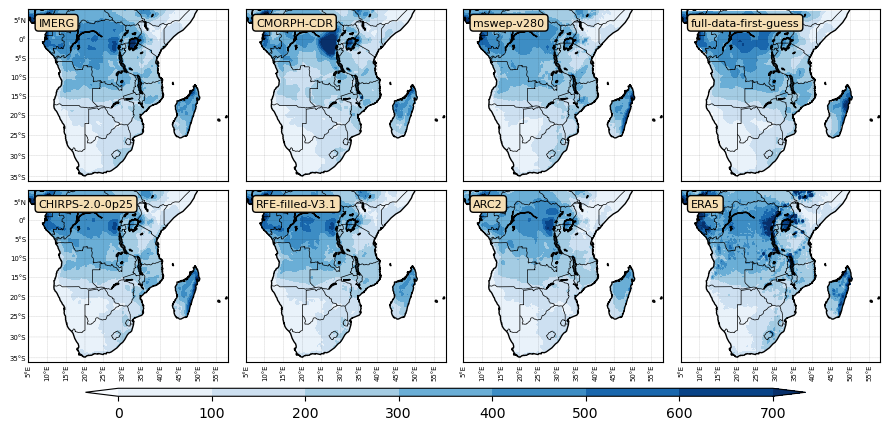

In [12]:

#fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,6))

year1 = str(1991)
year2 = str(2020)



#for index in indices:
#    print(index)
var = 'pr'
variables = ['pr']

observed_data = files_obs_seas_clim
ref_file = [observed_data[0]]
observed_data = observed_data[1:len(observed_data)]
ifile = ref_file[0]
#ax = fig.add_subplot(3, 2, i+1)

file_xr = xr.open_dataset(ifile)

#variables = list(file_xr.keys())

for var in variables:
    fig = plt.figure(figsize=(9,4))
    i=1
    ax = fig.add_subplot(2, 4, i)
    ifile = ref_file[0]
    file_split=ifile.split("/")
    filename=file_split[-1]
    filename_split=filename.split("_")
    filename_base=filename.split(".")[0]
    institute=filename_split[2]  
    dataset=filename_split[3]
    file_xr = xr.open_dataset(ifile)
    #units = file_xr[var].attrs['units']
    lons = file_xr.variables['longitude'][:]
    lats = file_xr.variables['latitude'][:]
    levs = np.arange(choose_var_bias(var)[0],choose_var_bias(var)[1], choose_var_bias(var)[2])
    map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
    x2d, y2d = map(*np.meshgrid(lons,lats))
    clim_var_ref = file_xr[var]
    clim_var_ref =clim_var_ref.mean('time')
    clim_var_ref = clim_var_ref*mask
    pl1 = map.contourf(x2d,y2d,clim_var_ref[:,:],levs,extend='both',cmap='Blues')
    min_val = clim_var_ref.min().values
    max_val = clim_var_ref.max().values
    print([min_val, max_val])
    map.drawcoastlines()
    map.drawcountries()
    map.drawparallels(np.arange(-80., 81., 5), \
        labels=[1,0,0,0], fontsize=5,linewidth=0.1)
    map.drawmeridians(np.arange(-180., 181., 5),\
            labels=[0,0,0,0], fontsize=0,linewidth=0.1)

    props = dict(boxstyle='round', facecolor='wheat', alpha=1)
    ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)

    for ifile in observed_data: 
        i=i+1
        var = 'pr'
        ax = fig.add_subplot(2, 4, i)
        file_split=ifile.split("/")
        filename=file_split[-1]
        filename_split=filename.split("_")
        filename_base=filename.split(".")[0]
        institute=filename_split[2]  
        dataset=filename_split[3]
        print(dataset)
        file_xr = xr.open_dataset(ifile)
        lons = file_xr.variables['longitude'][:]
        lats = file_xr.variables['latitude'][:]
        if dataset == 'mswep-v280':
            var = 'precipitation'
        levs_1 = np.arange(choose_var_bias(var)[3],choose_var_bias(var)[4], choose_var_bias(var)[5])
        map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
        x2d, y2d = map(*np.meshgrid(lons,lats))
        clim_var = file_xr[var]
        clim_var = clim_var.mean('time')
        clim_var = clim_var*mask
        clim_var_bias = clim_var - clim_var_ref
        min_val = clim_var.min().values
        max_val = clim_var.max().values

        #print([min_val, max_val])
        pl2 = map.contourf(x2d,y2d,clim_var[:,:],levs,extend='both',cmap='Blues')
        map.drawcoastlines()
        map.drawcountries()

        if i in [2,3,4]:
                map.drawparallels(np.arange(-80., 81., 5), \
                labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                map.drawmeridians(np.arange(-180., 181., 5),\
                labels=[0,0,0,0], fontsize=0,linewidth=0.1)
        if i in [5]:
                map.drawparallels(np.arange(-80., 81., 5), \
                labels=[1,0,0,0], fontsize=5,linewidth=0.1)
                map.drawmeridians(np.arange(-180., 181., 5),\
                labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)
        if i in [6,7,8,9]:
                map.drawparallels(np.arange(-80., 81., 5), \
                labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                map.drawmeridians(np.arange(-180., 181., 5),\
                labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)

        props = dict(boxstyle='round', facecolor='wheat', alpha=1)
        ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)

    cax = fig.add_axes([0.1, -0.01, 0.8, 0.02])   
    bar = fig.colorbar(pl2, cax=cax, orientation='horizontal')
    bar2.set_label('Total Precipitation (mm)',size=10)
    plt.tight_layout()

    #fig.suptitle(var, fontsize=16, y=1.05)
    #fig.show()
    #plt.savefig('Images/prcptot/'+var+'_no_bias.png', bbox_inches='tight',dpi=300)



CMORPH-CDR
mswep-v280
full-data-first-guess
CHIRPS-2.0-0p25
RFE-filled-V3.1
ARC2
ERA5


/tmp/ipykernel_11801/2615744637.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


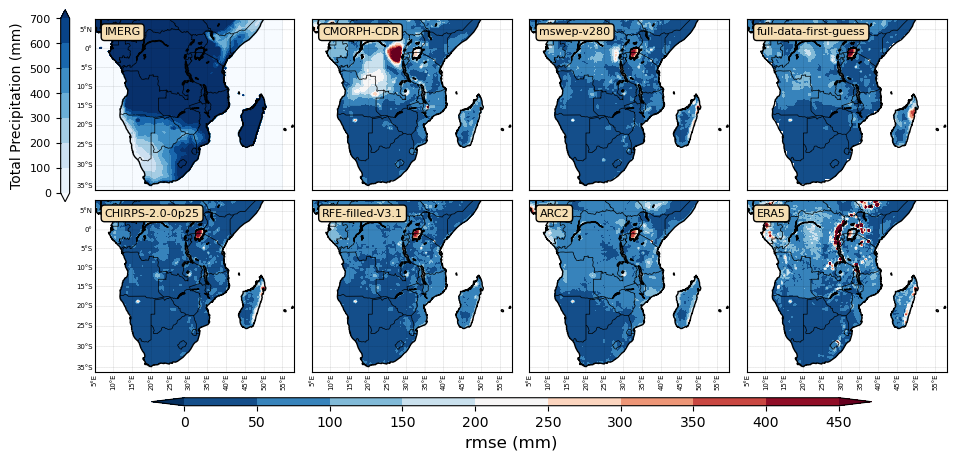

In [13]:

#fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,6))

year1 = str(2001)
year2 = str(2020)



#for index in indices:
#    print(index)
var = 'pr'
variables = ['pr']

observed_data = files_obs_seas
ref_file = [observed_data[0]]
observed_data = observed_data[1:len(observed_data)]
ifile = ref_file[0]
#ax = fig.add_subplot(3, 2, i+1)

file_xr = xr.open_dataset(ifile)

#variables = list(file_xr.keys())

for var in variables:
    fig = plt.figure(figsize=(9,4))
    i=1
    ax = fig.add_subplot(2, 4, i)
    ifile = ref_file[0]
    file_split=ifile.split("/")
    filename=file_split[-1]
    filename_split=filename.split("_")
    filename_base=filename.split(".")[0]
    institute=filename_split[2]  
    dataset=filename_split[3]
    file_xr = xr.open_dataset(ifile)
    #units = file_xr[var].attrs['units']
    lons = file_xr.variables['longitude'][:]
    lats = file_xr.variables['latitude'][:]
    levs = np.arange(choose_var_bias(var)[0],choose_var_bias(var)[1], choose_var_bias(var)[2])
    map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
    x2d, y2d = map(*np.meshgrid(lons,lats))
    clim_var_ref = file_xr[var].sel(time=slice(year1,year2))
    clim_var_ref = clim_var_ref*mask
    #clim_var_ref =clim_var_ref.resample(time='1M').sum('time')
    clim_var_ref_1 =clim_var_ref.resample(time='1Y').sum().mean('time')
    
    #clim_var_ref = file_xr_ref[var].sel(time=slice(year1,year2))
    #clim_var_ref1 = file_xr_ref[var].sel(time=slice(year1,year2)).mean('time')

    pl1 = map.contourf(x2d,y2d,clim_var_ref_1[:,:],levs,extend='both',cmap='Blues')
    min_val = clim_var_ref.min().values
    max_val = clim_var_ref.max().values
    #print([min_val, max_val])
    map.drawcoastlines()
    map.drawcountries()
    map.drawparallels(np.arange(-80., 81., 5), \
        labels=[1,0,0,0], fontsize=5,linewidth=0.1)
    map.drawmeridians(np.arange(-180., 181., 5),\
            labels=[0,0,0,0], fontsize=0,linewidth=0.1)

    props = dict(boxstyle='round', facecolor='wheat', alpha=1)
    ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)

    for ifile in observed_data: 
        i=i+1
        var = 'pr'
        ax = fig.add_subplot(2, 4, i)
        file_split=ifile.split("/")
        filename=file_split[-1]
        filename_split=filename.split("_")
        filename_base=filename.split(".")[0]
        institute=filename_split[2]  
        dataset=filename_split[3]
        print(dataset)
        file_xr = xr.open_dataset(ifile)
        lons = file_xr.variables['longitude'][:]
        lats = file_xr.variables['latitude'][:]
        if dataset == 'mswep-v280':
            var = 'precipitation'
        levs_1 = np.arange(choose_var_rsme(var)[3],choose_var_rsme(var)[4], choose_var_rsme(var)[5])
        map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
        x2d, y2d = map(*np.meshgrid(lons,lats))
        clim_var = file_xr[var].sel(time=slice(year1,year2))
        clim_var = clim_var*mask
        #clim_var = clim_var.resample(time='1M').sum('time')
        #clim_var = clim_var.mean('time')
        clim_var_rsme = xskillscore.rmse(clim_var_ref.resample(time="1Y").mean(),
                                         clim_var.resample(time="1Y").mean(),dim='time', skipna=True)
        #clim_var_bias = clim_var - clim_var_ref
        min_val = clim_var_rsme.min().values
        max_val = clim_var_rsme.max().values

        #print([min_val, max_val])
        pl2 = map.contourf(x2d,y2d,clim_var_rsme[:,:],levs_1,extend='both',cmap='RdBu_r')
        map.drawcoastlines()
        map.drawcountries()

        if i in [2,3,4]:
                map.drawparallels(np.arange(-80., 81., 5), \
                labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                map.drawmeridians(np.arange(-180., 181., 5),\
                labels=[0,0,0,0], fontsize=0,linewidth=0.1)
        if i in [5]:
                map.drawparallels(np.arange(-80., 81., 5), \
                labels=[1,0,0,0], fontsize=5,linewidth=0.1)
                map.drawmeridians(np.arange(-180., 181., 5),\
                labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)
        if i in [6,7,8,9]:
                map.drawparallels(np.arange(-80., 81., 5), \
                labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                map.drawmeridians(np.arange(-180., 181., 5),\
                labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)

        props = dict(boxstyle='round', facecolor='wheat', alpha=1)
        ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)

    cax2 = fig.add_axes([-0.001, 0.5, 0.01, 0.48])    
    bar2 = fig.colorbar(pl1, cax=cax2, orientation='vertical', ticklocation = 'left', extend = 'min')
    bar2.set_label('Total Precipitation (mm)',size=10)
    bar2.ax.tick_params(labelsize=8) 
    #bar2.ax.tick_params(labelsize=8,labelleft='True', labelright = 'False', left = 'True', right = 'False')

    cax = fig.add_axes([0.1, -0.01, 0.8, 0.02])   
    bar = fig.colorbar(pl2, cax=cax, orientation='horizontal')
    bar.set_label('rmse (mm)',size=12)
    plt.tight_layout()
    #fig.suptitle(var, fontsize=16, y=1.05)
    #fig.show()
    #plt.savefig('Images/prcptot/'+var+'_rsme.png', bbox_inches='tight',dpi=300)



In [14]:
xxx

NameError: name 'xxx' is not defined

def choose_var_trend(var):
        return {
        #'variable': ['min_ref', 'max_ref', 'step', 'min_bias', 'max_bias', 'step_bias', 'units']
        'pr'                                                        :  [ 150, 700, 50, -9, 11, 2],
        'precipitation'                                             :  [ 150, 700, 50, -9, 11, 2],
    }[var]

def get_linear_mk(_y, what="slope"):

    try:
        res = mk.original_test(_y)
        if what=="slope":
            return res.slope[0]
        elif what=="pval":
            return res.p[0]    # results from the t_test, checking if the data follows a 
        elif what=="intercept":
            return res.params[0]

    except:
        res = np.nan
        
hatches = ['....', None,None,None,None,None,None,None, None,None, None, None,None,None,None,None,None,None,None,None]
levs_pval = np.arange(0,1,0.05)
#fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,6))

year1 = str(1991)
year2 = str(2020)

var = 'pr'
variables = ['pr']

observed_data = files_obs_seas
ref_file = [observed_data[0]]
observed_data = observed_data[1:len(observed_data)]
#ifile = ref_file[0]
#ax = fig.add_subplot(3, 2, i+1)

#file_xr = xr.open_dataset(ifile)
#file_xr = file_xr.chunk('auto')
seasons = [3, 6, 9, 12]
#variables = list(file_xr.keys())
for month in seasons:
    if month == 12:
        season = 'DJF'
    if month == 3:
        season = 'MAM'
    if month == 9:
        season = 'SON'
    if month ==6:
        season = 'JJA'
    for var in variables:
        fig = plt.figure(figsize=(9,4))
        i=1
        ax = fig.add_subplot(2, 4, i)
        ifile = ref_file[0]
        file_split=ifile.split("/")
        filename=file_split[-1]
        filename_split=filename.split("_")
        filename_base=filename.split(".")[0]
        institute=filename_split[2]  
        dataset=filename_split[3]
        file_xr = xr.open_dataset(ifile)
        file_xr = file_xr.chunk('auto')
        #units = file_xr[var].attrs['units']
        lons = file_xr.variables['longitude'][:]
        lats = file_xr.variables['latitude'][:]
        levs = np.arange(choose_var_trend(var)[3],choose_var_trend(var)[4], choose_var_trend(var)[5])
        map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
        x2d, y2d = map(*np.meshgrid(lons,lats))

        clim_var_ref = file_xr[var].sel(time=slice(year1,year2))
        clim_var_ref = clim_var_ref.resample(time="QS-DEC").sum()
        clim_var_ref_seas = clim_var_ref[clim_var_ref.time.dt.month == month]
        #clim_var_ref = file_xr[var].sel(time=slice(year1,year2))
        #clim_var_ref =clim_var_ref.resample(time='1Y').sum('time')
        clim_var_ref_seas = clim_var_ref_seas*mask

        output = []
        output_p = []
        print('we got here')
        
        for l in np.arange(len(lats)):
            for m in np.arange(len(lons)):
                lon, lat = [lons[m], lats[l]]
                ts = clim_var_ref_seas.sel(latitude = lat).sel(longitude = lon)
                #try:
                try:
                    slope_mk = mk.original_test(ts).slope
                    slope_sig = mk.original_test(ts).p
                except:
                    slope_mk = np.nan
                    slope_sig = np.nan
                output.append(slope_mk)
                output_p.append(slope_sig)
        
        print('we got here 2')
        output = np.copy(output).reshape(len(lats), len(lons))
        output_p = np.copy(output_p).reshape(len(lats), len(lons))

        slopes = xr.DataArray(output, dims = ('latitude', 'longitude' ), coords= {'longitude':lons, 'latitude':lats})    
        slopes_p = xr.DataArray(output_p, dims = ('latitude', 'longitude' ), coords= {'longitude':lons, 'latitude':lats})    

        pl1 = map.contourf(x2d,y2d,slopes[:,:],levs,extend='both',cmap='RdBu')
        ab2 = map.contourf(x2d,y2d,slopes_p[:,:],levs_pval,hatches=hatches, colors = 'none')

        map.drawcoastlines()
        map.drawcountries()
        map.drawparallels(np.arange(-80., 81., 5), \
            labels=[1,0,0,0], fontsize=5,linewidth=0.1)
        map.drawmeridians(np.arange(-180., 181., 5),\
                labels=[0,0,0,0], fontsize=0,linewidth=0.1)

        props = dict(boxstyle='round', facecolor='wheat', alpha=1)
        ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)
        ax.text(0.65, 0.07, (str(clim_var_ref_seas.time.min().dt.year.values), str(clim_var_ref_seas.time.max().dt.year.values)),
                fontsize=6, verticalalignment='top', transform=ax.transAxes, bbox=props  )
        print(dataset, season,(str(clim_var_ref_seas.time.min().dt.year.values), str(clim_var_ref_seas.time.max().dt.year.values)))
        for ifile in observed_data: 
            i=i+1
            var = 'pr'
            ax = fig.add_subplot(2, 4, i)
            file_split=ifile.split("/")
            filename=file_split[-1]
            filename_split=filename.split("_")
            filename_base=filename.split(".")[0]
            institute=filename_split[2]  
            dataset=filename_split[3]
            file_xr = xr.open_dataset(ifile)
            file_xr = file_xr.chunk('auto')
            lons = file_xr.variables['longitude'][:]
            lats = file_xr.variables['latitude'][:]
            if dataset == 'mswep-v280':
                var = 'precipitation'
            levs_1 = np.arange(choose_var_trend(var)[3],choose_var_trend(var)[4], choose_var_trend(var)[5])
            map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
            x2d, y2d = map(*np.meshgrid(lons,lats))
            clim_var = file_xr[var].sel(time=slice(year1,year2))
            clim_var = clim_var.resample(time="QS-DEC").sum()
            clim_var_seas = clim_var[clim_var.time.dt.month == month]
            #clim_var = clim_var.resample(time='1Y').sum('time')
            clim_var = clim_var_seas*mask
            #clim_var = clim_var.mean('time')
            output = []
            output_p = []
            for l in np.arange(len(lats)):
                for m in np.arange(len(lons)):
                    lon, lat = [lons[m], lats[l]]
                    ts = clim_var.sel(latitude = lat).sel(longitude = lon)
                    #try:
                    try:
                        slope_mk = mk.original_test(ts).slope
                        slope_sig = mk.original_test(ts).p
                    except:
                        slope_mk = np.nan
                        slope_sig = np.nan
                    output.append(slope_mk)
                    output_p.append(slope_sig)

            output = np.copy(output).reshape(len(lats), len(lons))
            output_p = np.copy(output_p).reshape(len(lats), len(lons))

            slopes = xr.DataArray(output, dims = ('latitude', 'longitude' ), coords= {'longitude':lons, 'latitude':lats})    
            slopes_p = xr.DataArray(output_p, dims = ('latitude', 'longitude' ), coords= {'longitude':lons, 'latitude':lats})    

            pl2 = map.contourf(x2d,y2d,slopes[:,:],levs,extend='both',cmap='RdBu')
            ab2 = map.contourf(x2d,y2d,slopes_p[:,:],levs_pval,hatches=hatches, colors = 'none')
            
            map.drawcoastlines()
            map.drawcountries()

            if i in [2,3,4]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
            if i in [5]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[1,0,0,0], fontsize=5,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)
            if i in [6,7,8,9]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)

            props = dict(boxstyle='round', facecolor='wheat', alpha=1)
            ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)

            ax.text(0.6, 0.07, (str(clim_var_seas.time.min().dt.year.values), str(clim_var_seas.time.max().dt.year.values)),
                    fontsize=6, verticalalignment='top', transform=ax.transAxes, bbox=props  )
            #print(dataset, season,(str(clim_var_seas.time.min().dt.year.values), str(clim_var_seas.time.max().dt.year.values)))
        cax = fig.add_axes([0.1, -0.01, 0.8, 0.02])   
        bar = fig.colorbar(pl2, cax=cax, orientation='horizontal')
        bar.set_label('Gradient (mm/yr)',size=12)
        plt.tight_layout()
        fig.suptitle('Seasonal Precipitation Trend - '+ season, fontsize=16, y=1.05)
        #fig.show()
        #plt.savefig('Images/prcptot/'+var+'_linear_trend_'+season+'_mk.png', bbox_inches='tight',dpi=300)



/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


IMERG MAM ('2001', '2020')


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version 

IMERG JJA ('2000', '2020')


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version 

IMERG SON ('2000', '2020')


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version 

IMERG DJF ('2000', '2019')


/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/tiro/miniconda3/envs/my_env_latest/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version 

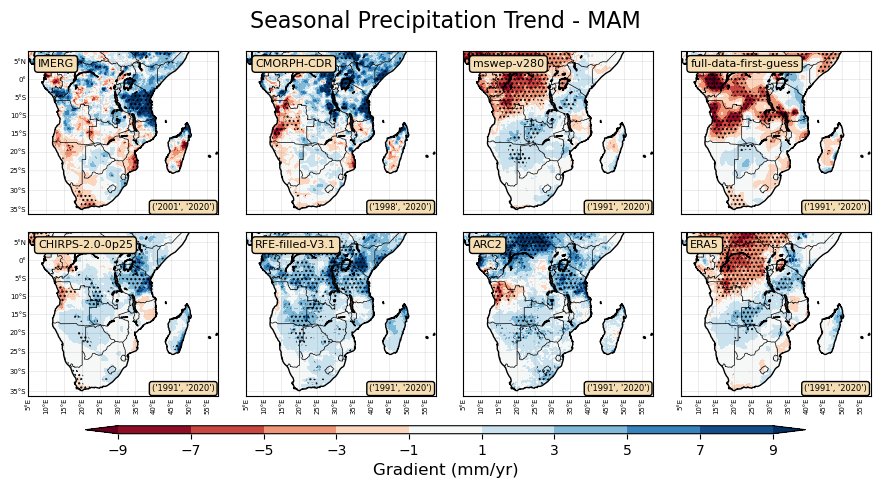

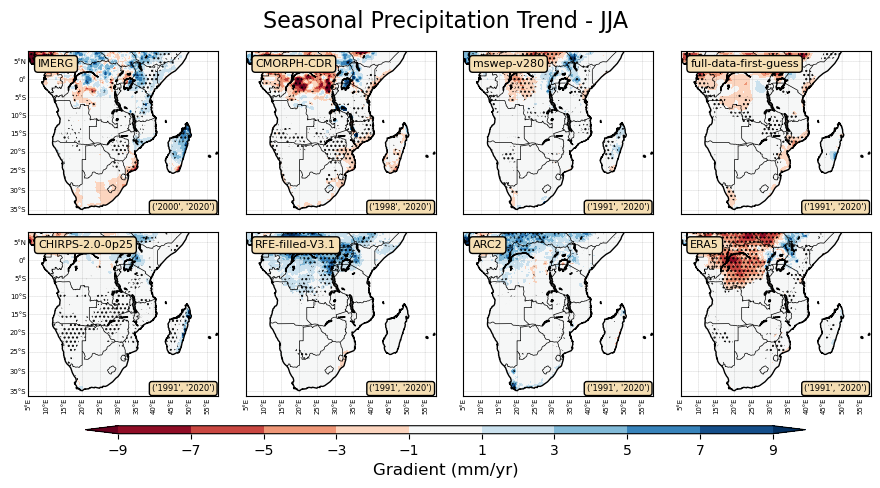

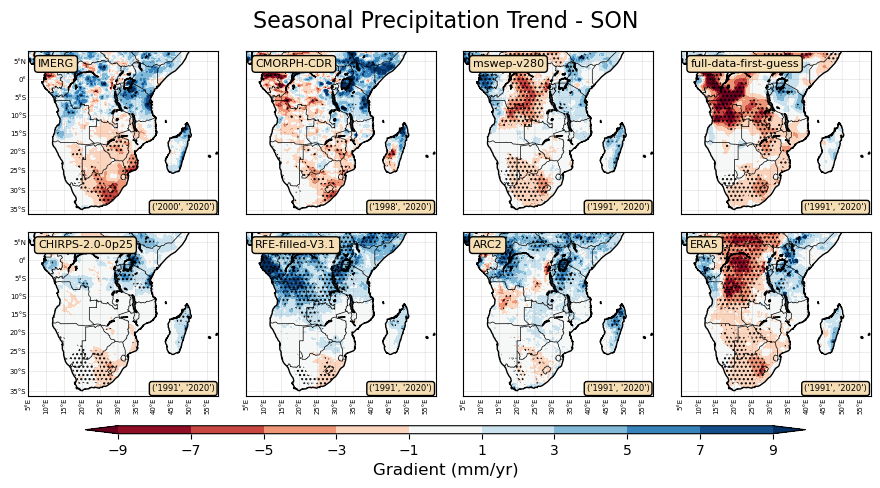

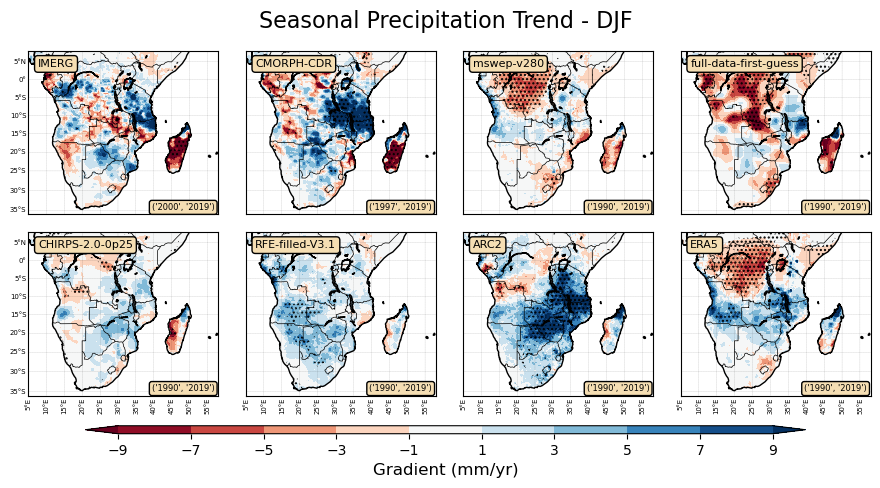

In [16]:
def choose_var_trend(var):
        return {
        #'variable': ['min_ref', 'max_ref', 'step', 'min_bias', 'max_bias', 'step_bias', 'units']
        'pr'                                                        :  [ 150, 700, 50, -9, 11, 2],
        'precipitation'                                             :  [ 150, 700, 50, -9, 11, 2],
    }[var]


hatches = ['....', None,None,None,None,None,None,None, None,None, None, None,None,None,None,None,None,None,None,None]
levs_pval = np.arange(0,1,0.05)
#fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,6))

year1 = str(1991)
year2 = str(2020)

var = 'pr'
variables = ['pr']

observed_data = files_obs_seas
ref_file = [observed_data[0]]
observed_data = observed_data[1:len(observed_data)]
ifile = ref_file[0]
#ax = fig.add_subplot(3, 2, i+1)

file_xr = xr.open_dataset(ifile)

seasons = [3, 6, 9, 12]
#variables = list(file_xr.keys())
for month in seasons:
    if month == 12:
        season = 'DJF'
    if month == 3:
        season = 'MAM'
    if month == 9:
        season = 'SON'
    if month ==6:
        season = 'JJA'
    for var in variables:
        fig = plt.figure(figsize=(9,4))
        i=1
        ax = fig.add_subplot(2, 4, i)
        ifile = ref_file[0]
        file_split=ifile.split("/")
        filename=file_split[-1]
        filename_split=filename.split("_")
        filename_base=filename.split(".")[0]
        institute=filename_split[2]  
        dataset=filename_split[3]
        file_xr = xr.open_dataset(ifile)
        file_xr = file_xr.chunk('auto')
        #units = file_xr[var].attrs['units']
        lons = file_xr.variables['longitude'][:]
        lats = file_xr.variables['latitude'][:]
        levs = np.arange(choose_var_trend(var)[3],choose_var_trend(var)[4], choose_var_trend(var)[5])
        map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
        x2d, y2d = map(*np.meshgrid(lons,lats))

        clim_var_ref = file_xr[var].sel(time=slice(year1,year2))
        clim_var_ref = clim_var_ref.resample(time="QS-DEC").sum()
        clim_var_ref_seas = clim_var_ref[clim_var_ref.time.dt.month == month]
        #clim_var_ref = file_xr[var].sel(time=slice(year1,year2))
        #clim_var_ref =clim_var_ref.resample(time='1Y').sum('time')
        clim_var_ref_seas = clim_var_ref_seas*mask

        res_slope=(np.ma.apply_along_axis(get_linear, 0, clim_var_ref_seas, what='slope'))
        res_pval = (np.ma.apply_along_axis(get_linear, 0, clim_var_ref_seas, what='pval'))

        pl1 = map.contourf(x2d,y2d,res_slope[:,:],levs,extend='both',cmap='RdBu')
        ab2 = map.contourf(x2d,y2d,res_pval[:,:],levs_pval,hatches=hatches, colors = 'none')

        map.drawcoastlines()
        map.drawcountries()
        map.drawparallels(np.arange(-80., 81., 5), \
            labels=[1,0,0,0], fontsize=5,linewidth=0.1)
        map.drawmeridians(np.arange(-180., 181., 5),\
                labels=[0,0,0,0], fontsize=0,linewidth=0.1)

        props = dict(boxstyle='round', facecolor='wheat', alpha=1)
        ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)
        ax.text(0.65, 0.07, (str(clim_var_ref_seas.time.min().dt.year.values), str(clim_var_ref_seas.time.max().dt.year.values)),
                fontsize=6, verticalalignment='top', transform=ax.transAxes, bbox=props  )
        #print(dataset, season,(str(clim_var_ref_seas.time.min().dt.year.values), str(clim_var_ref_seas.time.max().dt.year.values)))
        for ifile in observed_data: 
            i=i+1
            var = 'pr'
            ax = fig.add_subplot(2, 4, i)
            file_split=ifile.split("/")
            filename=file_split[-1]
            filename_split=filename.split("_")
            filename_base=filename.split(".")[0]
            institute=filename_split[2]  
            dataset=filename_split[3]
            file_xr = xr.open_dataset(ifile)
            file_xr = file_xr.chunk('auto')
            lons = file_xr.variables['longitude'][:]
            lats = file_xr.variables['latitude'][:]
            if dataset == 'mswep-v280':
                var = 'precipitation'
            levs_1 = np.arange(choose_var_trend(var)[3],choose_var_trend(var)[4], choose_var_trend(var)[5])
            map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
            x2d, y2d = map(*np.meshgrid(lons,lats))
            clim_var = file_xr[var].sel(time=slice(year1,year2))
            clim_var = clim_var.resample(time="QS-DEC").sum()
            clim_var_seas = clim_var[clim_var.time.dt.month == month]
            #clim_var = clim_var.resample(time='1Y').sum('time')
            clim_var = clim_var_seas*mask
            #clim_var = clim_var.mean('time')
            res_slope=(np.ma.apply_along_axis(get_linear, 0, clim_var, what='slope'))
            res_pval = (np.ma.apply_along_axis(get_linear, 0, clim_var, what='pval'))
            #min_val = clim_var_corr.min().values
            #max_val = clim_var_corr.max().values

            #print([min_val, max_val])
            pl2 = map.contourf(x2d,y2d,res_slope[:,:],levs,extend='both',cmap='RdBu')
            ab2 = map.contourf(x2d,y2d,res_pval[:,:],levs_pval,hatches=hatches, colors = 'none')
            map.drawcoastlines()
            map.drawcountries()

            if i in [2,3,4]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
            if i in [5]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[1,0,0,0], fontsize=5,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)
            if i in [6,7,8,9]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)

            props = dict(boxstyle='round', facecolor='wheat', alpha=1)
            ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)

            ax.text(0.65, 0.07, (str(clim_var_seas.time.min().dt.year.values), str(clim_var_seas.time.max().dt.year.values)),
                    fontsize=6, verticalalignment='top', transform=ax.transAxes, bbox=props  )
            #print(dataset, season,(str(clim_var_seas.time.min().dt.year.values), str(clim_var_seas.time.max().dt.year.values)))
        cax = fig.add_axes([0.1, -0.01, 0.8, 0.02])   
        bar = fig.colorbar(pl2, cax=cax, orientation='horizontal')
        bar.set_label('Gradient (mm/yr)',size=12)
        plt.tight_layout()
        fig.suptitle('Seasonal Precipitation Trend - '+ season, fontsize=16, y=1.05)
        #fig.show()
        #plt.savefig('Images/prcptot/'+var+'_linear_trend_'+season+'.png', bbox_inches='tight',dpi=300)



In [ ]:
def choose_var_trend(var):
        return {
        #'variable': ['min_ref', 'max_ref', 'step', 'min_bias', 'max_bias', 'step_bias', 'units']
        'pr'                                                        :  [ 150, 700, 50, -9, 11, 2],
        'precipitation'                                             :  [ 150, 700, 50, -9, 11, 2],
    }[var]


hatches = ['....', None,None,None,None,None,None,None, None,None, None, None,None,None,None,None,None,None,None,None]
levs_pval = np.arange(0,1,0.05)
#fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,6))

year1 = str(1991)
year2 = str(2020)

var = 'pr'
variables = ['pr']

observed_data = files_obs_seas
ref_file = [observed_data[0]]
observed_data = observed_data[1:len(observed_data)]
ifile = ref_file[0]
#ax = fig.add_subplot(3, 2, i+1)

file_xr = xr.open_dataset(ifile)

seasons = [3, 6, 9, 12]
#variables = list(file_xr.keys())
for month in seasons:
    if month == 12:
        season = 'DJF'
    if month == 3:
        season = 'MAM'
    if month == 9:
        season = 'SON'
    if month ==6:
        season = 'JJA'
    for var in variables:
        fig = plt.figure(figsize=(9,4))
        i=1
        ax = fig.add_subplot(2, 4, i)
        ifile = ref_file[0]
        file_split=ifile.split("/")
        filename=file_split[-1]
        filename_split=filename.split("_")
        filename_base=filename.split(".")[0]
        institute=filename_split[2]  
        dataset=filename_split[3]
        file_xr = xr.open_dataset(ifile)
        #units = file_xr[var].attrs['units']
        lons = file_xr.variables['longitude'][:]
        lats = file_xr.variables['latitude'][:]
        levs = np.arange(choose_var_trend(var)[3],choose_var_trend(var)[4], choose_var_trend(var)[5])
        map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
        x2d, y2d = map(*np.meshgrid(lons,lats))

        clim_var_ref = file_xr[var].sel(time=slice(year1,year2))
        clim_var_ref = clim_var_ref.resample(time="QS-DEC").sum()
        clim_var_ref_seas = clim_var_ref[clim_var_ref.time.dt.month == month]
        #clim_var_ref = file_xr[var].sel(time=slice(year1,year2))
        #clim_var_ref =clim_var_ref.resample(time='1Y').sum('time')
        clim_var_ref_seas = clim_var_ref_seas*mask

        output = []
        output_p = []
        for l in np.arange(len(lats)):
            for m in np.arange(len(lons)):
                lon, lat = [lons[m], lats[l]]
                ts = clim_var_ref_seas.sel(latitude = lat).sel(longitude = lon)
                #try:
                try:
                    slope_mk = mk.original_test(ts).slope
                    slope_sig = mk.original_test(ts).p
                except:
                    slope_mk = np.nan
                    slope_sig = np.nan
                output.append(slope_mk)
                output_p.append(slope_sig)

        output = np.copy(output).reshape(len(lats), len(lons))
        output_p = np.copy(output_p).reshape(len(lats), len(lons))

        slopes = xr.DataArray(output, dims = ('latitude', 'longitude' ), coords= {'longitude':lons, 'latitude':lats})    
        slopes_p = xr.DataArray(output_p, dims = ('latitude', 'longitude' ), coords= {'longitude':lons, 'latitude':lats})    
                #min_val = clim_var_corr.min().values
        #max_val = clim_var_corr.max().values

        #print([min_val, max_val])
        pl2 = map.contourf(x2d,y2d,slopes[:,:],levs,extend='both',cmap='RdBu')
        ab2 = map.contourf(x2d,y2d,slopes_p[:,:],levs_pval,hatches=hatches, colors = 'none')
        map.drawcoastlines()
        map.drawcountries()
        map.drawparallels(np.arange(-80., 81., 5), \
            labels=[1,0,0,0], fontsize=5,linewidth=0.1)
        map.drawmeridians(np.arange(-180., 181., 5),\
                labels=[0,0,0,0], fontsize=0,linewidth=0.1)

        props = dict(boxstyle='round', facecolor='wheat', alpha=1)
        ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)
        ax.text(0.65, 0.07, (str(clim_var_ref_seas.time.min().dt.year.values), str(clim_var_ref_seas.time.max().dt.year.values)),
                fontsize=6, verticalalignment='top', transform=ax.transAxes, bbox=props  )
        print(dataset, season,(str(clim_var_ref_seas.time.min().dt.year.values), str(clim_var_ref_seas.time.max().dt.year.values)))
        for ifile in observed_data: 
            i=i+1
            var = 'pr'
            ax = fig.add_subplot(2, 4, i)
            file_split=ifile.split("/")
            filename=file_split[-1]
            filename_split=filename.split("_")
            filename_base=filename.split(".")[0]
            institute=filename_split[2]  
            dataset=filename_split[3]
            print(dataset)
            file_xr = xr.open_dataset(ifile)
            lons = file_xr.variables['longitude'][:]
            lats = file_xr.variables['latitude'][:]
            if dataset == 'mswep-v280':
                var = 'precipitation'
            levs_1 = np.arange(choose_var_trend(var)[3],choose_var_trend(var)[4], choose_var_trend(var)[5])
            map = Basemap ( projection ='mill',llcrnrlon=5,urcrnrlon=58, llcrnrlat=-36,urcrnrlat=8,resolution='l')
            x2d, y2d = map(*np.meshgrid(lons,lats))
            clim_var = file_xr[var].sel(time=slice(year1,year2))
            clim_var = clim_var.resample(time="QS-DEC").sum()
            clim_var_seas = clim_var[clim_var.time.dt.month == month]
            #clim_var = clim_var.resample(time='1Y').sum('time')
            clim_var = clim_var_seas*mask
            #clim_var = clim_var.mean('time')
            output = []
            output_p = []
            for l in np.arange(len(lats)):
                for m in np.arange(len(lons)):
                    lon, lat = [lons[m], lats[l]]
                    ts = clim_var.sel(latitude = lat).sel(longitude = lon)
                    #try:
                    try:
                        slope_mk = mk.original_test(ts).slope
                        slope_sig = mk.original_test(ts).p
                    except:
                        slope_mk = np.nan
                        slope_sig = np.nan
                    output.append(slope_mk)
                    output_p.append(slope_sig)

            output = np.copy(output).reshape(len(lats), len(lons))
            output_p = np.copy(output_p).reshape(len(lats), len(lons))

            slopes = xr.DataArray(output, dims = ('latitude', 'longitude' ), coords= {'longitude':lons, 'latitude':lats})    
            slopes_p = xr.DataArray(output_p, dims = ('latitude', 'longitude' ), coords= {'longitude':lons, 'latitude':lats})    
                    #min_val = clim_var_corr.min().values
            #max_val = clim_var_corr.max().values

            #print([min_val, max_val])
            pl2 = map.contourf(x2d,y2d,slopes[:,:],levs,extend='both',cmap='RdBu')
            ab2 = map.contourf(x2d,y2d,slopes_p[:,:],levs_pval,hatches=hatches, colors = 'none')            
            map.drawcoastlines()
            map.drawcountries()

            if i in [2,3,4]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
            if i in [5]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[1,0,0,0], fontsize=5,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)
            if i in [6,7,8,9]:
                    map.drawparallels(np.arange(-80., 81., 5), \
                    labels=[0,0,0,0], fontsize=0,linewidth=0.1)
                    map.drawmeridians(np.arange(-180., 181., 5),\
                    labels=[0,0,0,1], fontsize=5,linewidth=0.1, rotation=90)

            props = dict(boxstyle='round', facecolor='wheat', alpha=1)
            ax.text(0.05, 0.95, dataset, fontsize=8, verticalalignment='top', transform=ax.transAxes, bbox=props)

            ax.text(0.65, 0.07, (str(clim_var_seas.time.min().dt.year.values), str(clim_var_seas.time.max().dt.year.values)),
                    fontsize=6, verticalalignment='top', transform=ax.transAxes, bbox=props  )
            #print(dataset, season,(str(clim_var_seas.time.min().dt.year.values), str(clim_var_seas.time.max().dt.year.values)))
        cax = fig.add_axes([0.1, -0.01, 0.8, 0.02])   
        bar = fig.colorbar(pl2, cax=cax, orientation='horizontal')
        bar.set_label('Gradient (mm/yr)',size=12)
        plt.tight_layout()
        fig.suptitle('Seasonal Precipitation Trend - '+ season, fontsize=16, y=1.05)
        #fig.show()
        #plt.savefig('Images/prcptot/'+var+'_linear_trend_'+season+'_mk.png', bbox_inches='tight',dpi=300)



In [ ]:
output = []
output_p = []
for l in np.arange(len(lats)):
    for m in np.arange(len(lons)):
        lon, lat = [lons[m], lats[l]]
        ts = clim_var.sel(latitude = lat).sel(longitude = lon)
        #ts = np.ma.array(ts, mask=np.isnan(ts))
        #print(np.nanmin(ts), np.nanmax(ts))
        #try:
        try:
            slope_mk = mk.original_test(ts).slope
            slope_sig = mk.original_test(ts).p
        except:
            slope_mk = np.nan
            slope_sig = np.nan
        output.append(slope_mk)
        output_p.append(slope_sig)

output = np.copy(output).reshape(len(lats), len(lons))
output_p = np.copy(output_p).reshape(len(lats), len(lons))

slopes = xr.DataArray(output, dims = ('latitude', 'longitude' ), coords= {'longitude':lons, 'latitude':lats})    
slopes_p = xr.DataArray(output_p, dims = ('latitude', 'longitude' ), coords= {'longitude':lons, 'latitude':lats})    


In [ ]:
mk.original_test(ts)